In [2]:
import acoular as ac
from acoupipe.sampler import MicGeomSampler
from acoupipe.datasets.synthetic import DatasetSyntheticConfig
from acoupipe.datasets.synthetic import DatasetSynthetic
from acoupipe.datasets.features import create_feature

from traits.api import Callable, Int, cached_property, Property, Instance

import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.spatial.distance import pdist

def random_positions(min_num_mics, max_num_mics, generator):

        n = generator.integers(min_num_mics, max_num_mics + 1)   
        r = 0.5 * np.sqrt(generator.random(n))
        theta = 2 * np.pi * generator.random(n)

        x = r * np.cos(theta)
        y = r * np.sin(theta)
        z = np.zeros(n)

        positions = np.column_stack((x, y, z))

        positions -= positions.mean(axis=0)
        positions /= np.max(pdist(positions))
        
        print(positions.mean(axis=0))
        print(np.max(pdist(positions)))

        return positions.T


[-1.19262239e-17 -5.20417043e-18  0.00000000e+00]
1.0


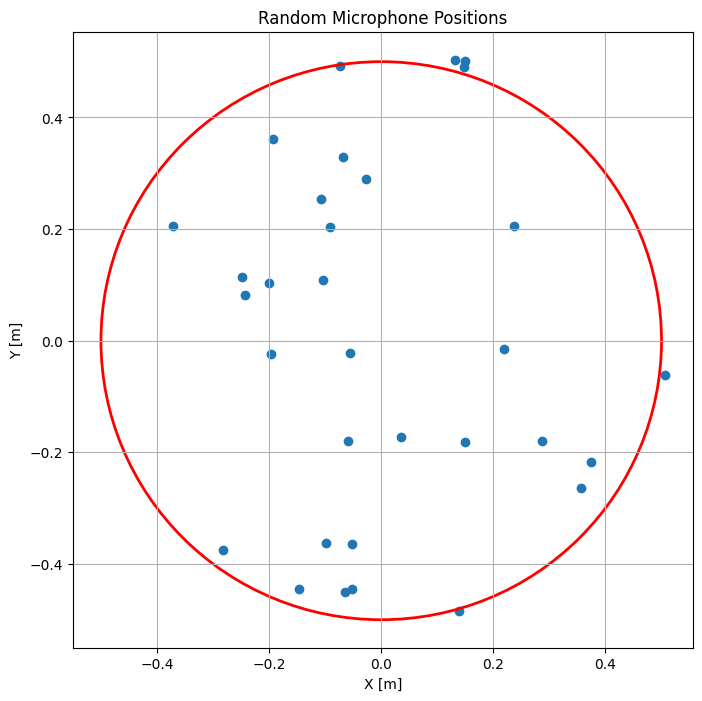

In [3]:
def plot_random_positions():
    generator = np.random.default_rng(seed=44)
    X = random_positions(32, 32, generator)

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(X[0, :], X[1, :])
    circle = plt.Circle((0, 0), 0.5, fill=False, color='red', linewidth=2)
    ax.add_patch(circle)
    plt.axis('equal')
    plt.title('Random Microphone Positions')
    plt.xlabel('X [m]')
    plt.ylabel('Y [m]')
    plt.grid()
    plt.show()

plot_random_positions()